<a href="https://colab.research.google.com/github/TatianaFlorentino/Machine-Learning/blob/master/%5BEstudo%5D_DS_para_People_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Contexto

## Retenção de talentos - People - Desafio


Com o imenso volume de dados sendo criado atualmente, é vital que as empresas saibam coletar e utilizar dados que possam dar a elas vantagens competitivas no mercado. 

Considerando que leva 51 dias em média para preencher vagas no setor de tecnologia da informação, as empresas gastam bilhões para não apenas recrutar talentos técnicos difíceis de encontrar, mas para substituir o mesmo talento ao sair em um ou dois anos. Sem mencionar o impacto nos cronogramas do projeto e no relacionamento com os clientes quando seus melhores engenheiros de software repentinamente anunciam a saída.
_____________________________________________________________________

## Escassez de profissionais de TI

A escassez de profissionais de tecnologia qualificados e o excesso de vagas disponíveis no mercado, com uma oferta de altos salários, agravaram esta situação, resultando no atual cenário orientado a candidatos, onde os candidatos têm mais poder do que os empregadores nas negociações de oferta de emprego. Isso também significa que eles não precisam desperdiçar tempo avaliando ofertas de emprego que não incluem salários competitivos, que estão aumentando devido à demanda contínua. Altos salários, juntamente com ambientes de trabalho tóxicos e maus-tratos de funcionários são os principais impulsionadores da rotatividade de talentos.
_____________________________________________________________________

## Engajamento

Porque que os profissionais de tecnologia estão saindo?

A pesquisa do LinkedIn com 10 mil pessoas que mudam de emprego descobriu que a principal razão para sair é a falta de oportunidade de carreira. Isto é seguido por uma liderança fraca e um ambiente e cultura desmotivadores, respectivamente.


![Screenshot](https://www.valamis.com/documents/10197/605345/hr-analytics.png)







##Data Science para People Analytics

A ideia utilizar uma pesquisa de satisfação para identificar notas mais baixas e problemas.


* **Detecção de problemas e Redução de Turnover** - Aqui, estamos abordando o exato tema deste projeto. Identificando os principais aspectos e pontos de interesse para as interações dos funcionários através de pesquisas internas, acompanhamento da equipe de RH, podem ajudar na identificação e prevenção de atritos, que podem ser os maiores causadores do turnover de funcionários. Esse trabalho ajuda a manter o ambiente de trabalho produtivo, agradável, o que contirbui para que os bons profissionais sejam mantidos. Assim como clientes, conseguir bons funcionários é difícil, e manter e qualificar os que já possui é vital. Por isso, esse trabalho é de extrema importância.




## O Projeto
> O objetivo deste projeto é analisar e buscar soluções para diminuir o **Turnover**, e aumentar a retenção de bons profissionais nas empresas.

Utilizando dados disponibilizados no [Kaggle]('https://kaggle.com/'), construiremos um modelo de Machine Learning capaz de nos ajudar a prever possíveis atritos, que podem ajudar empresas a tomarem decisões afim de minimizar esses efeitos, aumentar a qualidade de vida no ambiente de trabalho, e reter os bons profissionais da empresa.

In [ ]:
#@title
# hide warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# installing scikit-plot
!pip install -q scikit-plot

In [7]:
# importando os pacotes necessários
import pandas as pd


import numpy as np
import matplotlib.pyplot as plt
#import scikitscikitplotplot as skplt

!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# importando recursos de Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



## Origem dos dados

O conjunto de dados de RH foi projetado pelos drs. Rich Huebner e Carla Patalano acompanham um estudo de caso desenvolvido para estudantes de graduação em RH que estudam métricas, medições e análises de RH. Os alunos usam o software de RH e 
adquiridos através da plataforma de Ciência de Dados [Kaggle]('https://www.kaggle.com/rhuebner/human-resources-data-set')




In [8]:
# importando os dados

df_rh = pd.read_csv('https://raw.githubusercontent.com/TatianaFlorentino/trajetoriads/main/Datasets/HRDataset_v14.csv')


## Dicionário de variáveis
Breve explicação das variáveis categóricas:


Complexidade do conjunto de dados a um único arquivo de dados (v14). O CSV gira em torno de uma empresa fictícia e o conjunto de dados principais contém nomes, DOBs, idade, sexo, estado civil, data de contratação, motivos para rescisão, departamento, se estão ativos ou rescindidos, cargo, taxa de pagamento, nome do gerente, e pontuação de desempenho.

As adições recentes aos dados incluem:

Ausências
Data de avaliação de desempenho mais recente
Pontuação de engajamento do funcionário ex>pulse
Abaixo dicionario de dados
https://rpubs.com/rhuebner/hrd_cb_v14




In [9]:
# verificando as primeiras entradas
df_rh.head()
#verificar uma amostra
df_rh.sample(30)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
119,"Gross, Paula",10059,0,2,0,5,5,3,0,63813,1,19,Production Technician I,MA,2176,05/21/83,F,Divorced,US Citizen,No,White,2/21/2011,1/11/2014,more money,Voluntarily Terminated,Production,Kelley Spirea,18.0,CareerBuilder,Fully Meets,5.00,5,0,6/3/2013,0,17
58,"Crimmings, Jean",10132,0,0,0,2,5,3,0,56149,0,19,Production Technician I,MA,1821,04/10/87,F,Single,US Citizen,No,White,7/6/2016,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Fully Meets,4.12,5,0,1/28/2019,0,15
228,"Rachael, Maggie",10239,1,1,0,1,3,3,0,95920,0,4,BI Developer,MA,2110,05/12/80,F,Married,US Citizen,No,Black or African American,10/2/2016,NaN,N/A-StillEmployed,Active,IT/IS,Brian Champaigne,13.0,Indeed,Fully Meets,4.40,4,6,2/6/2019,0,10
234,"Robertson, Peter",10224,1,1,1,5,5,3,0,55578,1,20,Production Technician II,MA,2138,07/03/72,M,Married,US Citizen,No,White,7/5/2011,2/8/2012,Another position,Voluntarily Terminated,Production,Kissy Sullivan,20.0,Indeed,Fully Meets,4.20,5,0,1/6/2012,0,13
257,"Smith, Joe",10027,0,0,1,1,5,4,0,60656,0,20,Production Technician II,MA,2045,10/30/63,M,Single,US Citizen,No,White,9/29/2014,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Exceeds,4.30,3,0,1/28/2019,0,4
115,"Gordon, David",10051,1,1,1,1,5,3,0,48285,0,19,Production Technician I,MA,2169,05/21/79,M,Married,US Citizen,No,White,7/2/2012,NaN,N/A-StillEmployed,Active,Production,David Stanley,14.0,LinkedIn,Fully Meets,5.00,3,0,1/14/2019,0,2
157,"Landa, Hans",10092,1,1,1,4,5,3,0,82758,1,18,Production Manager,MA,1890,07/01/72,M,Married,US Citizen,No,White,1/10/2011,12/12/2015,attendance,Terminated for Cause,Production,Janet King,2.0,Employee Referral,Fully Meets,4.78,4,0,2/15/2015,0,9
217,"Peters, Lauren",10032,1,1,0,5,5,4,0,57954,1,20,Production Technician II,MA,1886,08/17/86,F,Married,US Citizen,No,White,5/16/2011,2/4/2013,more money,Voluntarily Terminated,Production,Ketsia Liebig,19.0,Indeed,Exceeds,4.20,5,0,1/10/2013,0,12
40,"Carter, Michelle",10040,0,0,0,1,6,3,0,71860,0,3,Area Sales Manager,VT,5664,05/15/63,F,Single,US Citizen,No,White,8/18/2014,NaN,N/A-StillEmployed,Active,Sales,John Smith,17.0,Indeed,Fully Meets,5.00,5,0,1/21/2019,0,7


In [10]:
# verificando o tamanho do dataset
print("Informações Sobre o Dataset")
print("Variáveis:\t {}".format(df_rh.shape[1]))
print("Entradas:\t {}\n".format(df_rh.shape[0]))
print("O dataset não apresenta dados ausentes:\n")

# identificando os tipos das variáveis
display(df_rh.info())

Informações Sobre o Dataset
Variáveis:	 36
Entradas:	 311

O dataset não apresenta dados ausentes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64

None

AttributeError: ignored

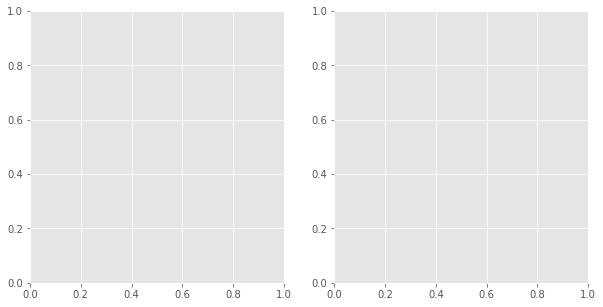

In [15]:
plt.style.use("ggplot")

fig, (ax1) = plt.subplots(1, 2, figsize=(10,5))

ax1.bar([Sex],[DateofTermination])


ax1.set(title="Gráfico de Barras Verticais", xlabel="Eixo x", ylabel=" Eixo y")

plt.show()

In [ ]:
# distribuição estatística das variáveis
df_rh.describe()



,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [ ]:
#principal departamento e salarios
df_rh.groupby(['Department']).Salary.value_counts(ascending=False)


Department            Salary
Admin Offices         49920     1
                      51920     1
                      55000     1
                      63000     1
                      63003     1
                               ..
Software Engineering  99280     1
                      100416    1
                      101199    1
                      105688    1
                      108987    1
Name: Salary, Length: 309, dtype: int64

In [ ]:
# distribuição estatística das variáveis categóricas
df_rh.describe(include='O')

,Employee_Name,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,LastPerformanceReview_Date
count,311,311,311,311,311,311,311,311,311,311,104,311,311,311,311,311,311,311
unique,311,32,28,307,2,5,3,4,6,101,96,18,3,6,21,9,4,137
top,"Bunbury, Jessica",Production Technician I,MA,07/07/84,F,Single,US Citizen,No,White,1/10/2011,9/7/2015,N/A-StillEmployed,Active,Production,Brannon Miller,Indeed,Fully Meets,1/14/2019
freq,1,137,276,2,176,137,295,282,187,14,2,207,207,209,22,87,243,18


### Insights
Algumas informações básicas podem ser retiradas desta distribuição estatística, como por exemplo:


* Como se trata de um conjunto de dados oriundo dos Estados Unidos, consideramos os valores monetários como Dólar. Neste caso, o salário médio mensal da empresa é de US$ 69.020,68 anual

### Insights
A variável `EmpSatisfaction` ("Nota da pesquisa satisfação"), indica se o funcionário possui pontua uma nota baixa, problema, no ambiente de trabalho. Usaremos ela como variável alvo do nosso modelo de Machine Learning. No nosso dataset, ela seria a categoria mais marcante de motivo para que o profissional saia da empresa, e por isso focamos nela.

Com acesso a mais dados, poderíamos usar outros indicadores, ou criar novas features que representem melhor a chance de um funcionário deixar a empresa.

* A maior parte dos funcionários nâo apresenta notas boas.
* O departamento com mais funcionários na empresa é 
* Mulheres são maioria na empresa.

* O emprego mais comum na empresa é de tecnico de producão.
* A maioria dos funcionários é casado.
* A maioria das posicoes que respondeu o questionario Production Technician I


## Igualdade de Gênero

<center><img alt="Recursos Humanos" width="60%" src="https://cio.com.br/wp-content/uploads/2019/04/diferen%C3%A7a-salarial-homens-e-mulheres.jpg"></center>


É muito importante estar atento a um tema como Igualdade de Gênero. Tendo acesso aos dados de salário e gênero dos funcionários do mesmo departamento, é possível ver como se comparam os salários entre homens e mulheres.

In [ ]:
# nível de salario por gênero
df_rh.groupby(['Sex']).Salary.value_counts(ascending=False)

Sex  Salary
F    57815     2
     61242     2
     45046     1
     45069     1
     45395     1
              ..
M    140920    1
     148999    1
     157000    1
     170500    1
     178000    1
Name: Salary, Length: 309, dtype: int64

In [ ]:
# distribuição estatística da variável salario por gênero
df_rh.groupby(['Sex']).Salary.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,176.0,67786.727273,25805.669834,45046.0,55397.5,62066.5,68238.25,250000.0
M,135.0,70629.400000,24285.293173,45115.0,55650.0,63353.0,75655.00,178000.0


In [ ]:
# distribuição estatística da renda departamento por gênero
df_rh.groupby(['Sex']).Position.describe()


,count,unique,top,freq
Sex,,,,
F,176,22,Production Technician I,83
M,135,25,Production Technician I,54


### Variável Alvo

Para que possamos entender e fazer operações com nossa variável alvo, nota, ou seja, EmpSatisfaction

In [ ]:
# quem foi a maioria q respondeu o questionario
df_rh.groupby(['EmpSatisfaction']).Position.describe()

,count,unique,top,freq
EmpSatisfaction,,,,
1,2,2,Area Sales Manager,1
2,9,5,Production Technician I,4
3,108,21,Production Technician I,41
4,94,19,Production Technician I,50
5,98,21,Production Technician I,42


## Gráfico de Densidade

Gráficos de Densidade são ferramentas visuais poderosas, que podem nos ajudar a ter insights valiosos.

Nosso principal objetivo aqui é analisar a distribuição das variáveis para as duas possibilidades do nosso problema de classificação.

Ao analisarmos as diferenças de distribuição das variáveis para cada classe, podemos identificar variáveis mais relevantes para o nosso problema.

In [23]:
df_rh['DateofTermination'] = pd.to_datetime(df_rh['DateofTermination'])




In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(df_rh['EmpSatisfaction'], df_rh['Department'])
# avaliando as pessoas que sairam, quais foram suas notas

#plt.bar(df_rh['DateofTermination'], df_rh['EmpSatisfaction'])



NameError: ignored

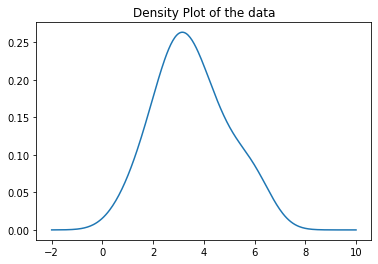

In [8]:


data = [2,3,3,4,2,1,5,6,4,3,3,3,6,4,5,4,3,2]
density = kde.gaussian_kde(data)
x = np.linspace(-2,10,300)
y=density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.show()

In [ ]:
# verificando outras possibilidades

### Insights sobre os gráficos de densidade quero descobrir 

Comentários da Paulinha : 
Análise descritiva, trazer data(1,2) sendo ruim - ve o perfil

proximos passos : 
fazer dataquality

Conversa com RH mostrando o perfil

Modelagem : utilizando uma tecnica regressão linerar ou outra tecnica, ramdom forest 

Ajuste no modelo 

Pega outra base com RH

Verificar com realidade - observação - performance 

Separa uma amostra ( ninguém faz nada) pra rodar de novo

treinar ( 2 meses ) 



Os Gráficos de Densidade são ferramentas interessantes para analisarmos as distribuições de acordo com as classes.

> A representação amarela é para funcionários que apresentam atritos e a representação azul para funcionários que não apresentam atrito.

O que buscamos aqui são diferenças nas distribuições para podermos encontrar pontos chave para previsão de atrito entre os funcionários.

No geral, as distribuições são bastante parecidas, não havendo grande discrepância. Por isso, destacarei aqui somente as discrepâncias entre as categorias.

Entre os principais insights obtidos, podemos destacar:
* Na variável `EmpSatisfaction` nota do funcionario
* Em relação à distância de casa 
* Na variável 'EngagementSurvey' (Envolvimento no Trabalho), 
* Na variavel  'Salary'
* Na variavel  origem de 'RecruitmentSource'

EmpSatisfaction', 'EngagementSurvey', 'Department', 'Salary', 'GenderID', 'Position', 'MaritalDesc', 'SpecialProjectsCount', 'PerformanceScore','RecruitmentSource', 'Absences', 'DaysLateLast30

Deploy - MLOPS 

Adicionar a tecnica e equação - > código de produtização - necessário garantir que todo processo funciona - quebra em faixas

Faixa 1  = + probalidade 

No padrão as variavel MLOPS deixando tempestividade/ frequência com pessoal rodar esse modelo 







#### Conclusões

I
em andamento
Isso pode ser aceitável, dependendo dos indicadores da empresa, mas para nosso modelo de Machine Learning não é o ideal. Iremos balancear nosso dataset para podemos fazer o Fit em nosso modelo posteriormente.